In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

df_age = df_no_na[df_no_na["AGE"] > 21]
# Use df_age for all models, where clustering algorithm models, such as Kmeans, randomforest, decision tree as they would have already categorise an age threshold within the model
df_age

# Use df_cluster only for logistic regression, lasso, ridge and elastic net - cross comparison of these models with df_age
df_cluster = df_age.copy()
df_cluster['cluster'] = df_cluster['AGE'].apply(lambda x: 1 if x >= 61 else 0)
df_cluster = df_cluster.drop("AGE", axis = 1)
df_cluster

# For cluster
original_features = df_cluster.columns.drop("LUNG_CANCER")

features_list = original_features.tolist()
features_list.append("const")

print(features_list)  # This will include all original features plus 'const'


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8998,1.0,63.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8999,1.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,cluster
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
8997,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1
8998,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
8999,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1


['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'cluster', 'const']


# Using numerical Age Column

## Simple logistics regression

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

y = df_age['LUNG_CANCER'].values
X = df_age.drop("LUNG_CANCER", axis = 1).values

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=999)

# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = None, max_iter = 10000)        # By default, penalty is l2 (i.e. ridge)
model.fit(X_train, y_train)

# Print the model coefficients
model.intercept_
model.coef_

# Fitted / Predicted y values: Default Threshold is 0.5
# Fitted / Predicted y values: Default Threshold is 0.5
y_pred = model.predict(X_val)                        # Gives values either 1 or 0, dependent on whether the probability is more than 0.5 or less than 0.5
y_pred

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))       # Row wise is actual while column wise is predicted

# Precision, Recall, F1 Score
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1 Score: {f1_score(y_val, y_pred)}")

LogisticRegression(max_iter=10000, penalty=None)

array([-0.58213])

array([[-0.90452079,  0.01412847,  0.34926485,  1.37339895,  0.04004848,
         0.24223784, -0.17941779,  0.52095082,  0.72398227, -0.69187662,
         1.49759062, -0.02685867, -0.37991672,  0.71996043, -0.08847576]])

array([1., 1., 1., ..., 1., 1., 0.])

Accuracy: 0.875
Confusion Matrix:
 [[ 154  224]
 [   1 1421]]
Precision: 0.8638297872340426
Recall: 0.9992967651195499
F1 Score: 0.9266384088686013


In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=999)

# Generate a large grid for C values
C_grid = np.logspace(-5, 3, num=100)  # From 10^-5 to 10^3 with 10 points

# Define parameter grids for Lasso, Ridge, and ElasticNet
lasso_param_grid = {'C': C_grid}
ridge_param_grid = {'C': C_grid}
elasticnet_param_grid = {
    'C': C_grid,
    'l1_ratio': np.linspace(0.01, 1, num=5)  # L1_ratio from 0.01 to 1 with 5 points
}

# Initialize the models
lasso_logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=999)
ridge_logistic_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000, random_state=999)
elasticnet_logistic_model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000, random_state=999)

# Lasso: Perform Grid Search with Cross-Validation on the training set
lasso_logistic_grid_search = GridSearchCV(lasso_logistic_model, lasso_param_grid, cv=kf, scoring='f1')
lasso_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Lasso Logistic Regression:", lasso_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Lasso Logistic Regression: {lasso_logistic_grid_search.best_score_:.4f}\n")

# Ridge: Perform Grid Search with Cross-Validation on the training set
ridge_logistic_grid_search = GridSearchCV(ridge_logistic_model, ridge_param_grid, cv=kf, scoring='f1')
ridge_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Ridge Logistic Regression:", ridge_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Ridge Logistic Regression: {ridge_logistic_grid_search.best_score_:.4f}\n")

# Elastic Net: Perform Grid Search with Cross-Validation on the training set
elasticnet_logistic_grid_search = GridSearchCV(elasticnet_logistic_model, elasticnet_param_grid, cv=kf, scoring='f1')
elasticnet_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Elastic Net Logistic Regression:", elasticnet_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Elastic Net Logistic Regression: {elasticnet_logistic_grid_search.best_score_:.4f}\n")

# Retrieve best model
lasso_best_model = lasso_logistic_grid_search.best_estimator_
ridge_best_model = ridge_logistic_grid_search.best_estimator_
elasticnet_best_model = elasticnet_logistic_grid_search.best_estimator_

# Use best model to predict on the validation set
y_pred_lasso = lasso_best_model.predict(X_val)
y_pred_ridge = ridge_best_model.predict(X_val)
y_pred_elasticnet = elasticnet_best_model.predict(X_val)

# Evaluate the best models: Calculate F1-score for each best model on the validation set
print(f"Lasso Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_lasso):.4f}")
print(f"Ridge Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_ridge):.4f}")
print(f"Elastic Net Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_elasticnet):.4f}")

GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          random_state=999,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.7...
       1.38488637e+01, 1.66810054e+01, 2.00923300e+01, 2.42012826e+01,
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03])},
             scoring='f1')

Best parameters for Lasso Logistic Regression: {'C': 4.534878508128592}
Best cross-validated f1-score for Lasso Logistic Regression: 0.9325



GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, random_state=999,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.74263683e-05,
       9...
       1.38488637e+01, 1.66810054e+01, 2.00923300e+01, 2.42012826e+01,
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03])},
             scoring='f1')

Best parameters for Ridge Logistic Regression: {'C': 11.49756995397738}
Best cross-validated f1-score for Ridge Logistic Regression: 0.9324



GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          random_state=999, solver='saga'),
             param_grid={'C': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05,...
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03]),
                         'l1_ratio': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])},
             scoring='f1')

Best parameters for Elastic Net Logistic Regression: {'C': 50.94138014816386, 'l1_ratio': 1.0}
Best cross-validated f1-score for Elastic Net Logistic Regression: 0.9314

Lasso Logistic Regression F1 Score on Validation Set: 0.9263
Ridge Logistic Regression F1 Score on Validation Set: 0.9263
Elastic Net Logistic Regression F1 Score on Validation Set: 0.9240


From the above, we see very weird results from the lasso, ridge and elastic net. F1 score did not improve much and elastic net best parameter is essential a lasso model but yielded two very different C values.
As such, using the original lasso would be better.

However, just a simple logistics regression gave a relatively high F1 score. hence, we shall stick to the simple logistics regression. 

In [21]:
import statsmodels.api as sm

x = df_age.drop(labels ="LUNG_CANCER", axis = 1)
y = df_age["LUNG_CANCER"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=999)  # Adjust test_size and random_state as needed

# Add a constant to the model (for the intercept) to the training data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)  # Optional if you need to predict on test data later

# Fit the logistic regression model on the training data using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

# Get the predicted probabilities from the test set
y_pred_prob = result.predict(X_test)

# Apply threshold to get the class predictions
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}")

Optimization terminated successfully.
         Current function value: 0.395193
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 7200
Model:                          Logit   Df Residuals:                     7184
Method:                           MLE   Df Model:                           15
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.1902
Time:                        14:43:13   Log-Likelihood:                -2845.4
converged:                       True   LL-Null:                       -3513.8
Covariance Type:            nonrobust   LLR p-value:                6.313e-276
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5810      0.226     -2.576      0.010      -1.023      -0.

# Using cluster, (all binary data)


## Simple logistic regression

In [76]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

y = df_cluster['LUNG_CANCER'].values
X = df_cluster.drop("LUNG_CANCER", axis = 1).values

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=999)

# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = None)        # By default, penalty is l2 (i.e. ridge)
model.fit(X_train, y_train)

# Print the model coefficients
model.intercept_
model.coef_

# Fitted / Predicted y values: Default Threshold is 0.5
y_pred = model.predict(X_val)                        # Gives values either 1 or 0, dependent on whether the probability is more than 0.5 or less than 0.5
y_pred

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))       # Row wise is actual while column wise is predicted

# Precision, Recall, F1 Score
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1 Score: {f1_score(y_val, y_pred)}")

LogisticRegression(penalty=None)

array([0.1456049])

array([[-0.90611442,  0.34958331,  1.37635644,  0.03894071,  0.24325014,
        -0.18102477,  0.52218976,  0.71693491, -0.69725856,  1.49781326,
        -0.02496981, -0.38448468,  0.71771285, -0.09045884,  0.27086448]])

array([1., 1., 1., ..., 1., 1., 0.])

Accuracy: 0.8677777777777778
Confusion Matrix:
 [[ 142  236]
 [   2 1420]]
Precision: 0.857487922705314
Recall: 0.9985935302390999
F1 Score: 0.9226770630279402


In [38]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=999)

# Generate a large grid for C values
C_grid = np.logspace(-5, 3, num=100)  # From 10^-5 to 10^3 with 10 points

# Define parameter grids for Lasso, Ridge, and ElasticNet
lasso_param_grid = {'C': C_grid}
ridge_param_grid = {'C': C_grid}
elasticnet_param_grid = {
    'C': C_grid,
    'l1_ratio': np.linspace(0.01, 1, num=5)  # L1_ratio from 0.01 to 1 with 5 points
}

# Initialize the models
lasso_logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=999)
ridge_logistic_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000, random_state=999)
elasticnet_logistic_model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000, random_state=999)

# Lasso: Perform Grid Search with Cross-Validation on the training set
lasso_logistic_grid_search = GridSearchCV(lasso_logistic_model, lasso_param_grid, cv=kf, scoring='f1')
lasso_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Lasso Logistic Regression:", lasso_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Lasso Logistic Regression: {lasso_logistic_grid_search.best_score_:.4f}\n")

# Ridge: Perform Grid Search with Cross-Validation on the training set
ridge_logistic_grid_search = GridSearchCV(ridge_logistic_model, ridge_param_grid, cv=kf, scoring='f1')
ridge_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Ridge Logistic Regression:", ridge_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Ridge Logistic Regression: {ridge_logistic_grid_search.best_score_:.4f}\n")

# Elastic Net: Perform Grid Search with Cross-Validation on the training set
elasticnet_logistic_grid_search = GridSearchCV(elasticnet_logistic_model, elasticnet_param_grid, cv=kf, scoring='f1')
elasticnet_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Elastic Net Logistic Regression:", elasticnet_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Elastic Net Logistic Regression: {elasticnet_logistic_grid_search.best_score_:.4f}\n")

# Retrieve best model
lasso_best_model = lasso_logistic_grid_search.best_estimator_
ridge_best_model = ridge_logistic_grid_search.best_estimator_
elasticnet_best_model = elasticnet_logistic_grid_search.best_estimator_

# Use best model to predict on the validation set
y_pred_lasso = lasso_best_model.predict(X_val)
y_pred_ridge = ridge_best_model.predict(X_val)
y_pred_elasticnet = elasticnet_best_model.predict(X_val)

# Evaluate the best models: Calculate F1-score for each best model on the validation set
print(f"Lasso Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_lasso):.4f}")
print(f"Ridge Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_ridge):.4f}")
print(f"Elastic Net Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_elasticnet):.4f}")

GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          random_state=999,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.7...
       1.38488637e+01, 1.66810054e+01, 2.00923300e+01, 2.42012826e+01,
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03])},
             scoring='f1')

Best parameters for Lasso Logistic Regression: {'C': 6.5793322465756825}
Best cross-validated f1-score for Lasso Logistic Regression: 0.9319



GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, random_state=999,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.74263683e-05,
       9...
       1.38488637e+01, 1.66810054e+01, 2.00923300e+01, 2.42012826e+01,
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03])},
             scoring='f1')

Best parameters for Ridge Logistic Regression: {'C': 3.7649358067924714}
Best cross-validated f1-score for Ridge Logistic Regression: 0.9319



GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          random_state=999, solver='saga'),
             param_grid={'C': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05,...
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03]),
                         'l1_ratio': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])},
             scoring='f1')

Best parameters for Elastic Net Logistic Regression: {'C': 4.534878508128592, 'l1_ratio': 0.01}
Best cross-validated f1-score for Elastic Net Logistic Regression: 0.9319

Lasso Logistic Regression F1 Score on Validation Set: 0.9227
Ridge Logistic Regression F1 Score on Validation Set: 0.9227
Elastic Net Logistic Regression F1 Score on Validation Set: 0.9227


Given that F1 score is lower for the dataframe with cluster, we shall stick to the original dataset.

# Inclusion of pairwise features

In [72]:
import pandas as pd
from itertools import product

feature_names = [col for col in df_cluster.columns if col != "LUNG_CANCER"]

df_pairwise = df_cluster.copy()
# Generate all combinations of interaction terms for these features
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        new_column_name = f'{feature_names[i]}_{feature_names[j]}'
        df_pairwise[new_column_name] = df_pairwise[feature_names[i]] * df_pairwise[feature_names[j]]

print(df_pairwise)

      GENDER  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0      0.0             0.0      1.0            1.0   
1        1.0      1.0             1.0      0.0            0.0   
2        1.0      0.0             0.0      0.0            0.0   
3        1.0      0.0             0.0      0.0            1.0   
4        0.0      1.0             0.0      0.0            1.0   
...      ...      ...             ...      ...            ...   
8996     1.0      0.0             1.0      1.0            1.0   
8997     0.0      1.0             1.0      1.0            0.0   
8998     1.0      1.0             0.0      0.0            1.0   
8999     1.0      1.0             1.0      0.0            0.0   
9099     1.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  ...  \
0                 0.0       1.0       0.0       0.0                0.0  ...   
1                 1.0       0.0       1.0       1.0          

/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_6381/92817673.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pairwise[new_column_name] = df_pairwise[feature_names[i]] * df_pairwise[feature_names[j]]
/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_6381/92817673.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pairwise[new_column_name] = df_pairwise[feature_names[i]] * df_pairwise[feature_names[j]]
/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_6381/92817673.py:11: PerformanceWarni

In [11]:
y = df_cluster['LUNG_CANCER'].values
X = df_cluster.drop("LUNG_CANCER", axis = 1).values

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=999)

# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = None)        # By default, penalty is l2 (i.e. ridge)
model.fit(X_train, y_train)

# Fitted / Predicted y values: Default Threshold is 0.5
y_pred = model.predict(X_val)                        # Gives values either 1 or 0, dependent on whether the probability is more than 0.5 or less than 0.5
y_pred

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))       # Row wise is actual while column wise is predicted

# Precision, Recall, F1 Score
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1 Score: {f1_score(y_val, y_pred)}")

LogisticRegression(penalty=None)

array([0., 1., 1., ..., 0., 1., 0.])

Accuracy: 0.8827777777777778
Confusion Matrix:
 [[ 193  185]
 [  26 1396]]
Precision: 0.8829854522454142
Recall: 0.9817158931082982
F1 Score: 0.9297369297369298


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score

# Define cross-validation strategy (e.g., 10-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=999)

# Generate a large grid for C values
C_grid = np.logspace(-5, 5, num=150)  

# Define parameter grids for Lasso, Ridge, and ElasticNet
lasso_param_grid = {'C': C_grid}
ridge_param_grid = {'C': C_grid}

# Initialize the models
lasso_logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=999)
ridge_logistic_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000, random_state=999)

# Lasso: Perform Grid Search with Cross-Validation on the training set
lasso_logistic_grid_search = GridSearchCV(lasso_logistic_model, lasso_param_grid, cv=kf, scoring='f1')
lasso_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Lasso Logistic Regression:", lasso_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Lasso Logistic Regression: {lasso_logistic_grid_search.best_score_:.4f}\n")

# Ridge: Perform Grid Search with Cross-Validation on the training set
ridge_logistic_grid_search = GridSearchCV(ridge_logistic_model, ridge_param_grid, cv=kf, scoring='f1')
ridge_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Ridge Logistic Regression:", ridge_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Ridge Logistic Regression: {ridge_logistic_grid_search.best_score_:.4f}\n")


# Retrieve best model
lasso_best_model = lasso_logistic_grid_search.best_estimator_
ridge_best_model = ridge_logistic_grid_search.best_estimator_


# Use best model to predict on the validation set
y_pred_lasso = lasso_best_model.predict(X_val)
y_pred_ridge = ridge_best_model.predict(X_val)


# Evaluate the best models: Calculate F1-score for each best model on the validation set
print(f"Lasso Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_lasso):.4f}")
print(f"Ridge Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_ridge):.4f}")


GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          random_state=999,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.16711619e-05, 1.36216020e-05, 1.58979923e-05,
       1.85548042e-05, 2.16556124e-05, 2.52746159e-05, 2.94984134e-05,
       3.44280759e-05, 4.01815648e-05, 4.68965549e-05, 5.4...
       2.09965360e+03, 2.45053971e+03, 2.86006458e+03, 3.33802767e+03,
       3.89586614e+03, 4.54692846e+03, 5.30679382e+03, 6.19364499e+03,
       7.22870335e+03, 8.43673672e+03, 9.84665203e+03, 1.14921870e+04,
       1.34127175e+04, 1.56541998e+04, 1.82702700e+04, 2.13235280e+04,
       2.48870348e+04, 2.90460612e+04, 3.39001283e+04, 3.95653887e+04,
       4.61774057e+04, 5.38943979e+04, 6.29010244e+04, 7.34128040e+04,
       8.56812721e+04, 1.00000000e+05])},
             scoring='f1')

Best parameters for Lasso Logistic Regression: {'C': 0.49886906858441177}
Best cross-validated f1-score for Lasso Logistic Regression: 0.9365



GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, random_state=999,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.16711619e-05, 1.36216020e-05, 1.58979923e-05,
       1.85548042e-05, 2.16556124e-05, 2.52746159e-05, 2.94984134e-05,
       3.44280759e-05, 4.01815648e-05, 4.68965549e-05, 5.47337285e-05,
       6...
       2.09965360e+03, 2.45053971e+03, 2.86006458e+03, 3.33802767e+03,
       3.89586614e+03, 4.54692846e+03, 5.30679382e+03, 6.19364499e+03,
       7.22870335e+03, 8.43673672e+03, 9.84665203e+03, 1.14921870e+04,
       1.34127175e+04, 1.56541998e+04, 1.82702700e+04, 2.13235280e+04,
       2.48870348e+04, 2.90460612e+04, 3.39001283e+04, 3.95653887e+04,
       4.61774057e+04, 5.38943979e+04, 6.29010244e+04, 7.34128040e+04,
       8.56812721e+04, 1.00000000e+05])},
             scoring='f1')

Best parameters for Ridge Logistic Regression: {'C': 0.793101660333306}
Best cross-validated f1-score for Ridge Logistic Regression: 0.9364



In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score
# Define cross-validation strategy (e.g., 10-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=999)

# Generate a large grid for C values
C_grid = np.logspace(-5, 5, num=150)  
elasticnet_param_grid = {
    'C': C_grid,
    'l1_ratio': np.linspace(0.01, 1, num=10)  # L1_ratio from 0.01 to 1 with 10 points
}

elasticnet_logistic_model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000, random_state=999)

# Elastic Net: Perform Grid Search with Cross-Validation on the training set
elasticnet_logistic_grid_search = GridSearchCV(elasticnet_logistic_model, elasticnet_param_grid, cv=kf, scoring='f1')
elasticnet_logistic_grid_search.fit(X_train, y_train)

print("Best parameters for Elastic Net Logistic Regression:", elasticnet_logistic_grid_search.best_params_)
print(f"Best cross-validated f1-score for Elastic Net Logistic Regression: {elasticnet_logistic_grid_search.best_score_:.4f}\n")

elasticnet_best_model = elasticnet_logistic_grid_search.best_estimator_
y_pred_elasticnet = elasticnet_best_model.predict(X_val)
print(f"Elastic Net Logistic Regression F1 Score on Validation Set: {f1_score(y_val, y_pred_elasticnet):.4f}")

Likewise, there is not much changes to the f1 score. I have decided to use cluster as it simplifies the data into two age groups rather than age. This is because the age distribution is dskewed on the tails and having it as cluster may reduce bias for the final model

In [76]:
# Creating logistic regresssion with all pairwise interaction
import statsmodels.api as sm

# Split the data into features and target
x = df_pairwise.drop(labels="LUNG_CANCER", axis=1)
y = df_pairwise["LUNG_CANCER"]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=999)  # Adjust test_size and random_state as needed

# Add a constant to the model (for the intercept) to the training data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model on the training data using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print summary of the model to check p-values
print(result.summary())

# Identify features to drop based on p-value > 0.001, excluding the constant
p_values = result.pvalues
features_to_drop = p_values[p_values > 0.001].index.drop(features_list, errors='ignore')  # Exclude the constant from dropping

# Remove features with p-value > 0.001 from X_train and X_test, keeping the constant
# Remove features with p-value > 0.001 from X_train
X_train_reduced = X_train.drop(columns=features_to_drop)

# Refit the model with reduced features
logit_model_reduced = sm.Logit(y_train, X_train_reduced)
result_reduced = logit_model_reduced.fit()

# Print summary of the reduced model
print(result_reduced.summary())

# Prepare X_test by ensuring it has the same features as X_train_reduced
X_test_reduced = X_test.loc[:, X_train_reduced.columns]

# Predict using the reduced model
y_pred_prob = result_reduced.predict(X_test_reduced)
y_pred = (y_pred_prob >= 0.5).astype(int)

f1_score(y_val, y_pred)

Optimization terminated successfully.
         Current function value: 0.341879
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 7200
Model:                          Logit   Df Residuals:                     7079
Method:                           MLE   Df Model:                          120
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.2995
Time:                        15:26:09   Log-Likelihood:                -2461.5
converged:                       True   LL-Null:                       -3513.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -

0.9261833829857663

In [82]:
# Given the above, we now remove the original features that are insignificant.
# We removed anxiety, coughing and chest pain

p_values2 = result_reduced.pvalues
features_to_drop2 = p_values2[p_values2 > 0.001].index.drop("const", errors='ignore')  # Exclude the constant from dropping

X_train_reduced2 = X_train_reduced.drop(columns=features_to_drop2)

# Refit the model with reduced features
logit_model_reduced = sm.Logit(y_train, X_train_reduced2)
result_reduced2 = logit_model_reduced.fit()

# Print summary of the reduced model
print(result_reduced2.summary())

# Prepare X_test by ensuring it has the same features as X_train_reduced
X_test_reduced2 = X_test.loc[:, X_train_reduced2.columns]

# Predict using the reduced model
y_pred_prob2 = result_reduced2.predict(X_test_reduced2)
y_pred2 = (y_pred_prob2 >= 0.5).astype(int)

f1_score(y_val, y_pred2)


Optimization terminated successfully.
         Current function value: 0.351945
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 7200
Model:                          Logit   Df Residuals:                     7172
Method:                           MLE   Df Model:                           27
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.2788
Time:                        15:32:25   Log-Likelihood:                -2534.0
converged:                       True   LL-Null:                       -3513.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5101

0.9277188328912467

In [84]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred2))       # Row wise is actual while column wise is predicted

# Precision, Recall, F1 Score
print(f"Precision: {precision_score(y_val, y_pred2)}")
print(f"Recall: {recall_score(y_val, y_pred2)}")

Confusion Matrix:
 [[ 183  195]
 [  23 1399]]
Precision: 0.8776662484316186
Recall: 0.9838255977496484


Threshold: 0.500
Precision: 0.8777
Recall: 0.9838
F1 Score: 0.9277
------------------------------
Threshold: 0.511
Precision: 0.8782
Recall: 0.9838
F1 Score: 0.9280
------------------------------
Threshold: 0.521
Precision: 0.8804
Recall: 0.9838
F1 Score: 0.9293
------------------------------
Threshold: 0.532
Precision: 0.8809
Recall: 0.9831
F1 Score: 0.9292
------------------------------
Threshold: 0.542
Precision: 0.8828
Recall: 0.9796
F1 Score: 0.9287
------------------------------
Threshold: 0.553
Precision: 0.8838
Recall: 0.9789
F1 Score: 0.9289
------------------------------
Threshold: 0.563
Precision: 0.8841
Recall: 0.9761
F1 Score: 0.9278
------------------------------
Threshold: 0.574
Precision: 0.8839
Recall: 0.9740
F1 Score: 0.9267
------------------------------
Threshold: 0.584
Precision: 0.8837
Recall: 0.9726
F1 Score: 0.9260
------------------------------
Threshold: 0.595
Precision: 0.8840
Recall: 0.9648
F1 Score: 0.9227
------------------------------
Threshold: 0.605
Pre

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Precision, Recall, and F1 Score vs. Threshold')

Text(0.5, 0, 'Threshold')

Text(0, 0.5, 'Score')

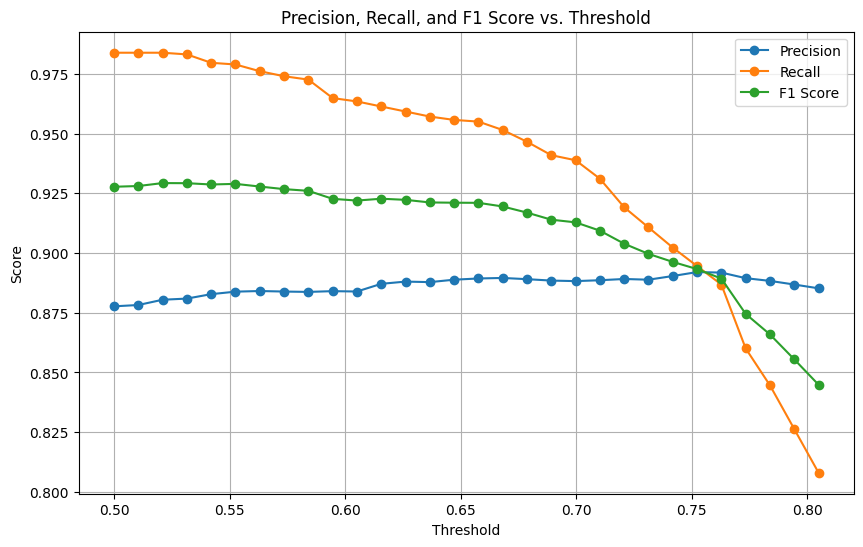

AttributeError: 'list' object has no attribute 'max'

In [124]:
# The problem with this particular dataset is that it is heavily skewed to having lung cancer. 
# Hence, I will run a gridsearch on the threshold value to allow for better precision but possibly a lower recall.
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt

def threshold_f1_score(y_true, y_prob, threshold=0.5):
    """Calculate F1 score based on a given threshold."""
    y_pred = (y_prob >= threshold).astype(int)
    return f1_score(y_true, y_pred)

def make_custom_scorer(threshold):
    return make_scorer(threshold_f1_score, needs_proba=True, threshold=threshold)

# Define a range of thresholds to test
thresholds = np.linspace(0.5, 0.805, 30)

# Predict probabilities using the final model above
y_probs = result_reduced2.predict(X_test_reduced2)

# Lists to store the scores for each threshold
precision_scores = []
recall_scores = []
f1_scores = []
# Evaluate each threshold
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    # Append scores
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print Precision, Recall, F1 Score
    print(f"Threshold: {threshold:.3f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)  # Separator for readability

    

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')

plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()



In [128]:
# Find the index of the maximum F1 score
max_index = np.argmax(f1_scores)
max_f1_score = f1_scores[max_index]
max_precision = precision_scores[max_index]
max_recall = recall_scores[max_index]
max_threshold = thresholds[max_index]

# Print the results
print(f"Maximum F1 Score: {max_f1_score:.4f}")
print(f"Corresponding Precision: {max_precision:.4f}")
print(f"Corresponding Recall: {max_recall:.4f}")
print(f"At Threshold: {max_threshold:.3f}")


Maximum F1 Score: 0.9293
Corresponding Precision: 0.8804
Corresponding Recall: 0.9838
At Threshold: 0.521


In [106]:
y_train.mean()
y_test.mean()

0.80875

0.79

In conclusion, having these features,
* GENDER                                     
* SMOKING                                     
* YELLOW_FINGERS                             
* PEER_PRESSURE                               
* FATIGUE                                     
* ALLERGY                                   
* WHEEZING                                   
* ALCOHOL CONSUMING                          
* SHORTNESS OF BREATH                        
* SWALLOWING DIFFICULTY                       
* cluster                                     
* GENDER_YELLOW_FINGERS                       
* GENDER_ALCOHOL CONSUMING         
* SMOKING_YELLOW_FINGERS                     
* SMOKING_cluster                            
* YELLOW_FINGERS_FATIGUE                    
* YELLOW_FINGERS_ALLERGY                     
* YELLOW_FINGERS_WHEEZING                    
* YELLOW_FINGERS_ALCOHOL CONSUMING           
* YELLOW_FINGERS_SHORTNESS OF BREATH         
* YELLOW_FINGERS_SWALLOWING DIFFICULTY       
* FATIGUE _ALLERGY                          
* FATIGUE _ALCOHOL CONSUMING                 
* FATIGUE _SHORTNESS OF BREATH               
* ALLERGY _ALCOHOL CONSUMING      
* WHEEZING_ALCOHOL CONSUMING              
* ALCOHOL CONSUMING_SWALLOWING DIFFICULTY

gave us the best logistic regression model in terms of F1 score. 

In addition, changing the threshold value did not affect the F1 score and the best score is roughly at threshold 0.5.

Possible to consider bootstrapping the dataset to assess the models predictive accuracy?

# Neural Network (Binary classification)

In [42]:
# Basic Example using softplus activation function in hidden layer
import random
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Ensure reproducibility by setting a seed value
random.seed(999)
tf.random.set_seed(999)
np.random.seed(999)
# split into X and Y
df_scaled = df_age.copy()

scaler = StandardScaler()

# Reshape data for scaling (fit_transform expects 2D array)
age_scaled = scaler.fit_transform(df_age['AGE'].values.reshape(-1, 1))

# Create a new DataFrame or assign the scaled data back to a column in the original DataFrame
df_scaled['scaled_age'] = age_scaled

# Optionally drop the original 'AGE' column if you don't need it
df_scaled = df_scaled.drop('AGE', axis=1)

df_scaled

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,scaled_age
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.025497
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.819532
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.150955
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,-0.592085
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.592085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.113723
8997,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.907758
8998,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.201950
8999,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.819532


In [50]:
import random
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Set seeds for reproducibility
random.seed(999)
tf.random.set_seed(999)
np.random.seed(999)

X = df_scaled.drop('LUNG_CANCER', axis=1).values
y = df_scaled['LUNG_CANCER'].values

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=999)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(15,)),  # Adjust input shape based on feature count
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val), verbose=1)


Epoch 1/100


/Users/junhaoteo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.6674 - loss: 0.6283 - val_accuracy: 0.8161 - val_loss: 0.4389
Epoch 2/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8328 - loss: 0.4248 - val_accuracy: 0.8611 - val_loss: 0.4151
Epoch 3/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8676 - loss: 0.4044 - val_accuracy: 0.8800 - val_loss: 0.4055
Epoch 4/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8816 - loss: 0.3942 - val_accuracy: 0.8850 - val_loss: 0.3966
Epoch 5/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8893 - loss: 0.3850 - val_accuracy: 0.8894 - val_loss: 0.3876
Epoch 6/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8957 - loss: 0.3758 - val_accuracy: 0.8939 - val_loss: 0.3789
Epoch 7/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8976 - loss: 0.3673 - val_accuracy: 0.8956 - val_loss: 0.3711
Epoch 8/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8983 - loss: 0.3599 - val_

In [52]:
from sklearn.metrics import f1_score

# Get predictions for the validation set
y_val_pred = model.predict(X_val)
# Convert probabilities to binary outputs (0 or 1)
y_val_pred = (y_val_pred > 0.5).astype(int)

# Calculate the F1 score
f1 = f1_score(y_val, y_val_pred)
print("Validation F1 Score:", f1)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
Validation F1 Score: 0.9421926910299003


In [64]:
# Grid Search
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the model-building function needed for KerasClassifier
def create_model(neurons=10, activation='relu', optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons, activation=activation, input_shape=(15,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define parameter grid
param_grid = {
    'epochs': [50, 100, 150, 200],
    'batch_size': [32, 64, 96, 120, 150],
    'neurons': [10, 20,30,40,50],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd']
}


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=999)

# Grid search logic
best_score = 0
best_params = {}

for params in ParameterGrid(param_grid):
    model = build_model(**params)
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    score = f1_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_params = params

print("Best F1 Score:", best_score)
print("Best Parameters:", best_params)





NameError: name 'build_model' is not defined

9000